In [1]:
import const
from helper import *

import numpy as np
import matplotlib.pyplot as plt
from sim import Init, Grid

plt.style.use('light_mode.mplstyle')


In [325]:
N         = 256
nH_init   = 1e2
vx_init   = 0
vy_init   = 0
temp_init = 100
boxsize   = 10*const.pc
Ndot      = 2e48
c_red     = 6e-4*const.c
time_sim  = 100*const.kyr
x_init    = 0

rho_init  = nH_init*const.mH
p_init    = nH_init*const.kB*temp_init


In [326]:
unit = SimpleNamespace(
    length = boxsize,
    time   = const.kyr,
    mass   = const.Msol,
    phot   = 1e58
)
unit.density = unit.mass/unit.length**3
unit.vel = unit.length/unit.time
unit.energy_density = unit.density*unit.vel**2


In [327]:
grid = Grid(N=N, C=0.4, bc_typ=[NEU, NEU], rsolve=HLL, sloper=MONCEN)

with Init(grid) as grid:
    
    grid.w[RHO] = rho_init/unit.density
    grid.w[VX]  = vx_init/unit.vel
    grid.w[VY]  = vy_init/unit.vel
    grid.w[P]   = p_init/unit.energy_density
    grid.u[ION] = x_init*rho_init/unit.density


In [345]:
#while grid.t < time_sim/unit.time:
for i in range(10):
    
    grid.inject([0.5, 0.5], Ndot/(unit.phot/unit.time))
    grid.step()


/var/folders/k0/yybwzjk54bg00p8q3ykchsx80000gp/T/ipykernel_90539/44658554.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(grid.x*unit.length/const.pc, grid.y*unit.length/const.pc, np.log10(grid.urad[NPHOT]*unit.phot), cmap='jet')


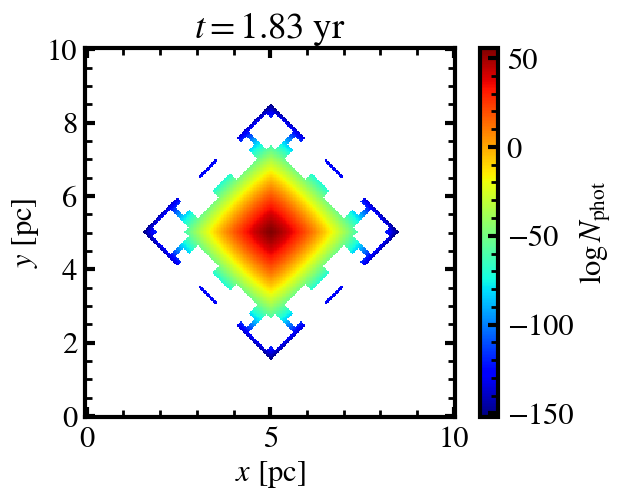

In [346]:
plt.pcolormesh(grid.x*unit.length/const.pc, grid.y*unit.length/const.pc, np.log10(grid.urad[NPHOT]*unit.phot), cmap='jet')
plt.gca().set_aspect(True)
cbar = plt.colorbar()

plt.title(r'$t = %.3g~{\rm yr}$' % (grid.t*unit.time/const.yr))
plt.xlabel(r'$x$ [${\rm pc}$]')
plt.ylabel(r'$y$ [${\rm pc}$]')
cbar.set_label(r'$\log N_{\rm phot}$')


In [29]:
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))


In [30]:
grid = Grid(N=256, C=0.4, bc_typ=np.array([PER, NEU]), rsolve=HLL, sloper=MONCEN, do_rad=False)

with Init(grid) as grid:
    
    grid.w[RHO] = 1 * (grid.y<0.5) + 2 * (grid.y>0.5)
    grid.w[VX]  = -0.5 * (grid.y<0.5) + 0.5 * (grid.y>0.5)
    grid.w[VY]  = 0.1 * np.sin(4*np.pi*grid.x) * gaussian(grid.y, 0.5, 0.02)
    grid.w[P]   = 3


In [63]:
for j in range(250):
    
    fig, axs = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
    plt.subplots_adjust(hspace=1e-3, wspace=1e-3)
    
    for i in range(3):

        axs[i].set_xticks([])
        axs[i].set_yticks([])

        cmap  = ['inferno', 'seismic', 'seismic', ''][i]
        label = [r'$\Delta \rho$', r'$v_x$', r'$v_y$'][i]
        lim = [0.5, 0.5, 0.5][i]
        offset = [1.5, 0, 0][i]
        im   = axs[i].pcolormesh(grid.x, grid.y, grid.w[i]-offset, cmap=cmap, vmin=-lim, vmax=lim)

        cax  = axs[i].inset_axes([0, 1, 1, 0.1])
        cbar = plt.colorbar(im, cax=cax, orientation='horizontal', ticks=[-0.4, -0.2, 0.0, 0.2, 0.4])

        cbar.set_label(label)
        cax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
        cax.xaxis.set_label_position('top')
    
    axs[0].annotate(r'$t = %d$' % (5*j), (0.05, 0.9), xycoords='axes fraction', horizontalalignment='left')
    
    plt.savefig('movie_kelvin/img%.4d.png'%j, dpi=256, bbox_inches='tight')
    grid.step(5)
    plt.close()
    print(j, end=',')


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,

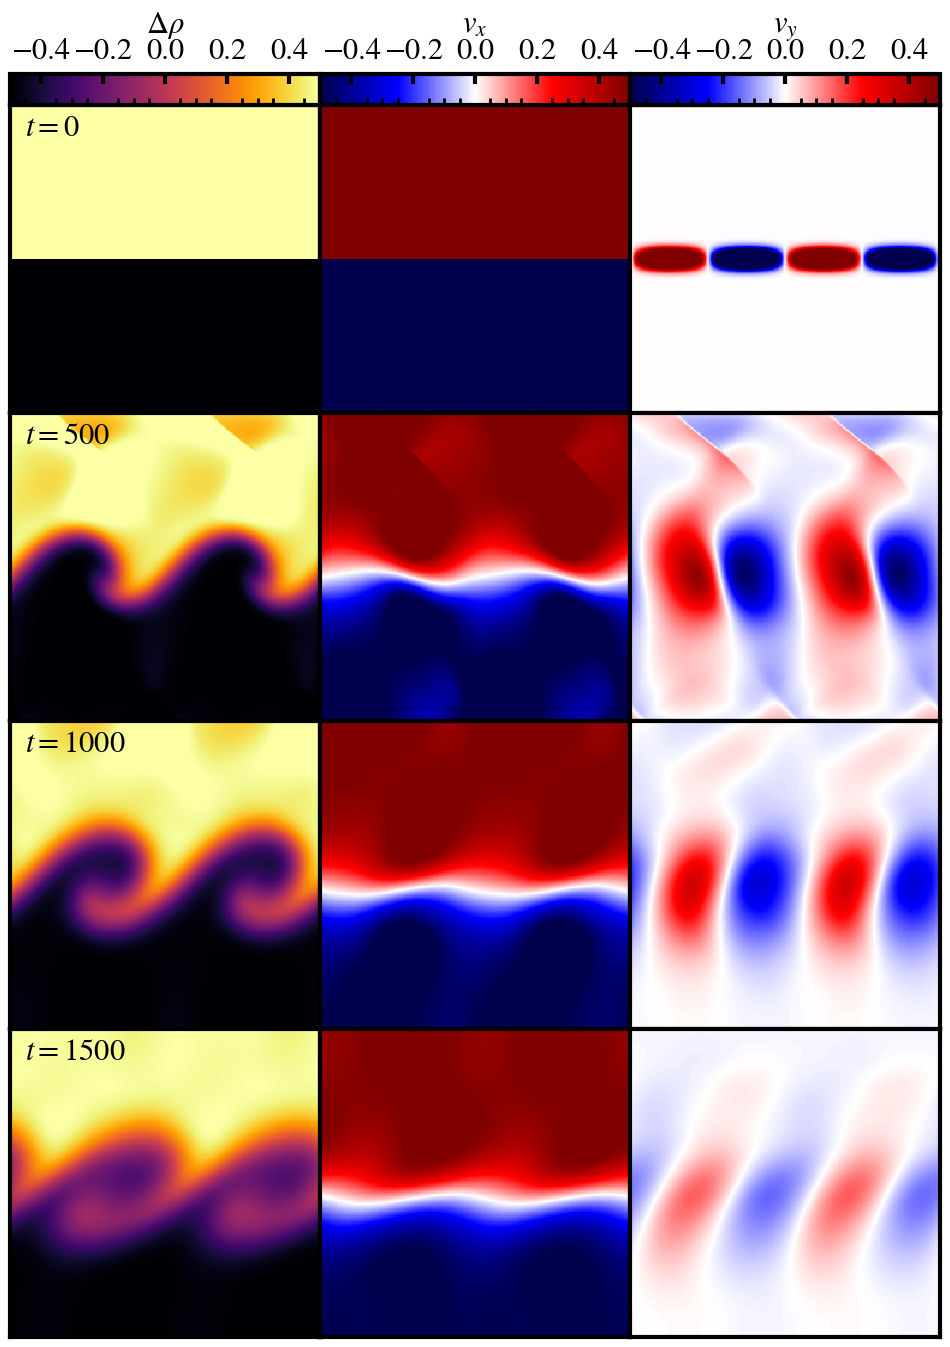

In [31]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 16), sharey=True)
plt.subplots_adjust(hspace=1e-3, wspace=1e-3)

for i in range(4):
    
    for j in range(3):
        
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        
        cmap  = ['inferno', 'seismic', 'seismic', ''][j]
        label = [r'$\Delta \rho$', r'$v_x$', r'$v_y$'][j]
        lim = [0.5, 0.5, 0.5][j]
        offset = [1.5, 0, 0][j]
        im   = axs[i, j].pcolormesh(grid.x, grid.y, grid.w[j]-offset, cmap=cmap, vmin=-lim, vmax=lim)
        
        if i == 0:
        
            cax  = axs[i, j].inset_axes([0, 1, 1, 0.1])
            cbar = plt.colorbar(im, cax=cax, orientation='horizontal', ticks=[-0.4, -0.2, 0.0, 0.2, 0.4])

            cbar.set_label(label)
            cax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
            cax.xaxis.set_label_position('top')
            
    axs[i, 0].annotate(r'$t = %d$' % (i*500), (0.05, 0.9), xycoords='axes fraction', horizontalalignment='left')
    
    if i < 3: grid.step(500, do_print=False)
    
#plt.savefig('kelvin.png', dpi=256, bbox_inches='tight')


In [263]:
grid = Grid(N=256, C=0.4, bc_typ=np.array([NEU, NEU]), do_hydro=False)


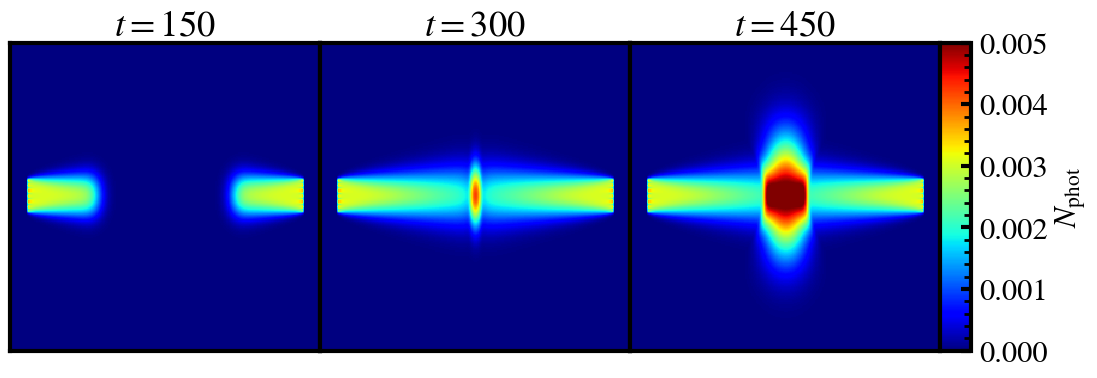

In [264]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
plt.subplots_adjust(hspace=1e-3, wspace=1e-3)

for i in range(3):

    for j in range(150):
        
        for k in np.arange(0.45, 0.555, 0.005): grid.inject([0.05, k], 1, xflux=0.99, yflux=0)
        for k in np.arange(0.45, 0.555, 0.005): grid.inject([0.95, k], 1, xflux=-0.99, yflux=0)
        grid.step()
    
    im = axs[i].pcolormesh(grid.x, grid.y, grid.urad[NPHOT], cmap='jet', vmin=0, vmax=0.005)
    
    axs[i].set_title(r'$t=%d$'%((i+1)*150))
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
cax  = axs[-1].inset_axes([1, 0, 0.1, 1])
cbar = plt.colorbar(im, cax=cax)
cbar.set_label(r'$N_{\rm phot}$')

#plt.savefig('rad.png', dpi=256, bbox_inches='tight')


In [70]:
for i in range(200):

    plt.pcolormesh(grid.x, grid.y, grid.urad[NPHOT], cmap='jet', vmin=0, vmax=0.005)
    plt.gca().set_aspect(True)
    cbar = plt.colorbar()
    cbar.set_label(r'$N_{\rm phot}$')
    plt.title(r'$t=%d$'%(5*i))
    plt.xticks([])
    plt.yticks([])
    
    plt.savefig('movie_rad/img%.4d.png'%i, dpi=256, bbox_inches='tight')
    plt.close()
    
    for j in range(5):
        for k in np.arange(0.45, 0.555, 0.005): grid.inject([0.05, k], 1, xflux=0.99, yflux=0)
        for k in np.arange(0.45, 0.555, 0.005): grid.inject([0.95, k], 1, xflux=-0.99, yflux=0)
        grid.step()
